In [1]:
import pandas as pd

weather_df = pd.read_csv('daegu-utf8.csv', encoding='utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object


In [2]:
weather_df.columns  = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
print(weather_df.columns)

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')


In [3]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [4]:
print(weather_df.head(5))
print(weather_df.shape)
num_rows = weather_df.shape[0]
num_missing = num_rows - weather_df.count()
print(num_missing)

          날짜     지점  평균기온  최저기온  최고기온
0 1907-01-31  143.0   NaN  -7.0   0.8
1 1907-02-01  143.0   NaN   NaN   NaN
2 1907-02-02  143.0   NaN   NaN   NaN
3 1907-02-03  143.0   NaN   NaN   NaN
4 1907-02-04  143.0   NaN   NaN   NaN
(42887, 5)
날짜        1
지점        1
평균기온    704
최저기온    630
최고기온    632
dtype: int64


In [5]:
weather_df = weather_df.dropna(axis=0)
print(weather_df.count())
print(weather_df.head(5))

날짜      42180
지점      42180
평균기온    42180
최저기온    42180
최고기온    42180
dtype: int64
            날짜     지점  평균기온  최저기온  최고기온
701 1909-01-01  143.0  -4.1  -8.0   0.1
702 1909-01-02  143.0  -0.8  -6.7   6.1
703 1909-01-03  143.0   1.0  -2.4   3.6
704 1909-01-04  143.0   4.2   0.0   9.2
705 1909-01-05  143.0   3.4  -0.4   9.0


In [6]:
weather_df.to_csv('daegu-utf8-df.csv', index=False, mode='w', encoding='utf-8-sig')


In [7]:
print('특정 연도와 달의 최고, 최저 기온 평균갑 계산')

year_df = weather_df[weather_df['날짜'].dt.year==2023]
month_df = year_df[year_df['날짜'].dt.month==8]
print(month_df.head())

특정 연도와 달의 최고, 최저 기온 평균갑 계산
              날짜     지점  평균기온  최저기온  최고기온
42551 2023-08-01  143.0  29.7  24.9  34.8
42552 2023-08-02  143.0  30.0  23.9  34.7
42553 2023-08-03  143.0  31.5  27.0  37.7
42554 2023-08-04  143.0  30.5  26.0  34.7
42555 2023-08-05  143.0  31.5  25.7  37.2


In [8]:
max_temp_mean = round(month_df['최고기온'].mean(),1)
min_temp_mean = round(month_df['최저기온'].mean(),1)

print(f'2023년 8월 최저 기온 평균 : {min_temp_mean} , 최고 기온 평균 : {max_temp_mean}')

2023년 8월 최저 기온 평균 : 24.0 , 최고 기온 평균 : 31.9


In [24]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
def draw_two_plots(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):

    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(10,4))
    plt.plot(x_data, max_temp_list1, marker = 's', markersize = 6, color = 'b', label = label_y1)
    plt.plot(x_data, max_temp_list2, marker = 's', markersize = 6, color = 'r', label = label_y2)
    plt.xticks(x_data)

    #plt.ylim(10,40)
    plt.title(title)
    plt.legend()
    plt.show()

In [25]:
def main():
    search_month = int(input(' 비교할 월을 입력하세요 : '))

    weather_df = pd.read_csv('daegu-utf8-df.csv',encoding = 'utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')

    first_decade_max_temp_list = [0]*10
    second_decade_max_temp_list = [0]*10

    first_decade = 1990
    second_decade = 2010

    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year==first_decade+year)&
                                    (weather_df['날짜'].dt.month == search_month)]
        first_decade_max_temp_list[year] = round(first_decade_df['최고기온'].mean(),1)

        second_decade_df = weather_df[(weather_df['날짜'].dt.year==second_decade+year)&
                                    (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year] = round(second_decade_df['최고기온'].mean(),1)

    print(f'{first_decade}년대 {search_month}월 최고 기온 평균 : {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균 : {second_decade_max_temp_list}')

    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list)/len(first_decade_max_temp_list),1)
    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list)/len(second_decade_max_temp_list),1)
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균 : {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균 : {second_decade_high_temp_mean}')
    x_data = [i for i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교', x_data, 
                   first_decade_max_temp_list, str(first_decade)+'년대',
                   second_decade_max_temp_list, str(second_decade)+'년대',)

1990년대 8월 최고 기온 평균 : [33.9, 28.3, 29.0, 27.0, 34.5, 34.0, 32.3, 30.9, 30.1, 29.1]
2010년대 8월 최고 기온 평균 : [33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2]
1990년대 8월 전체 최고 기온 평균 : 30.9
2010년대 8월 전체 최고 기온 평균 : 32.0


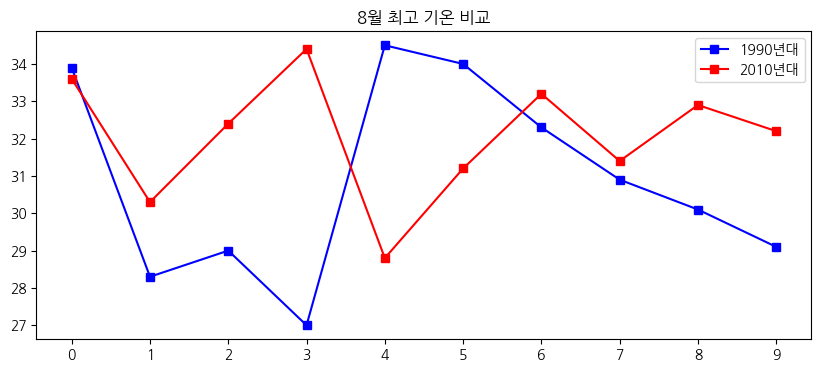

In [27]:
main()

1990년대 12월 최고 기온 평균 : [9.0, 9.8, 8.6, 8.0, 9.4, 7.5, 9.3, 8.3, 10.2, 8.0]
2010년대 12월 최고 기온 평균 : [7.3, 6.9, 3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0]
1990년대 12월 전체 최고 기온 평균 : 8.8
2010년대 12월 전체 최고 기온 평균 : 7.2


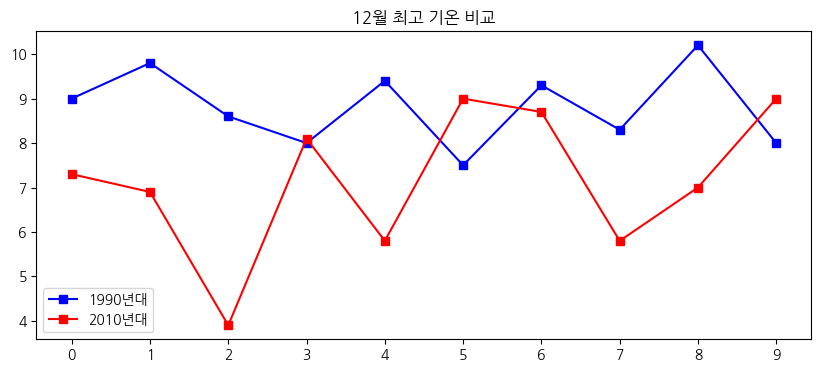

In [28]:
main()